- Joel Konitzer
- 4/24/2022
- Week 7 / Text Analytics
- Data Analytics

I. Introduction: This analysis aimed to demonstrate how text data is quantified to create analytics using text mining and natural language processing techniques. The explanatory power of the resulting analytics varies depending on the preprocessing done during the analysis process, which will is demonstrated here as well. The goal was to ultimately generate analytics that communicates details about a large body of text.

*II. Methods & Code **III. Results/Output ***IV. Analysis of Results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#NLTK Packages
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import stopwords
stop = stopwords.words('english')

import string
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline
sns.set()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jwkon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv('bbc.csv')

In [3]:
df.head()

,id,news,type
0,0,UK economy facing 'major risks'\n \n The UK ma...,business
1,1,Aids and climate top Davos agenda\n \n Climate...,business
2,2,Asian quake hits European shares\n \n Shares i...,business
3,3,India power shares jump on debut\n \n Shares i...,business
4,4,Lacroix label bought by US firm\n \n Luxury go...,business


In [21]:
#Create two value pairs from df to identify the datatypes and null values
def info(df):
    null_ = df.isna().any()
    dtypes = df.dtypes
    info = pd.concat([null_,dtypes], axis=1,keys=['Null','type'])
    print(info)
info(df)

       Null    type
id    False   int64
news  False  object
type  False  object


In [5]:
print('Dataframe shape:', df.shape)
df.describe().T

Dataframe shape: (2225, 3)


,count,mean,std,min,25%,50%,75%,max
id,2225.0,1112.0,642.446496,0.0,556.0,1112.0,1668.0,2224.0


##### Creating a column for the cleaned data. Keeping the original column could come in use later

In [6]:
df = df.copy()
df['news_clean'] = df['news']

#### 1. Preparation of the text data for analysis
- Elimination of stopwords, punctuation, digits, lowercase

In [7]:
def clean_remove(df):
    #Remove punctuation 
    df['news_clean'] = df.news.str.replace('[^\w\s]','')
    #Remove digits
    df['news_clean'] = df.news_clean.str.replace('\d+','')
    #Remove stopwords
    df['news_clean'] = df.news_clean.apply(lambda x: " ".join(w for w in x.split() if w not in stop))    
     #Lower case
    df['news_clean'] = df.news_clean.apply(lambda x: " ".join(x.lower() for x in x.split()))
    return df
df = clean_remove(df)

In [8]:
df

,id,news,type,news_clean
0,0,UK economy facing 'major risks'\n \n The UK ma...,business,uk economy facing major risks the uk manufactu...
1,1,Aids and climate top Davos agenda\n \n Climate...,business,aids climate top davos agenda climate change f...
2,2,Asian quake hits European shares\n \n Shares i...,business,asian quake hits european shares shares europe...
3,3,India power shares jump on debut\n \n Shares i...,business,india power shares jump debut shares indias la...
4,4,Lacroix label bought by US firm\n \n Luxury go...,business,lacroix label bought us firm luxury goods grou...
...,...,...,...,...
2220,2220,Warning over Windows Word files\n \n Writing a...,tech,warning windows word files writing microsoft w...
2221,2221,Fast lifts rise into record books\n \n Two hig...,tech,fast lifts rise record books two highspeed lif...
2222,2222,Nintendo adds media playing to DS\n \n Nintend...,tech,nintendo adds media playing ds nintendo releas...
2223,2223,Fast moving phone viruses appear\n \n Security...,tech,fast moving phone viruses appear security firm...


#### 2. Identify the 10 most frequently used words in the text

In [9]:
def freq_dist(df):
    df['news_clean'] = df.news_clean.apply(lambda x: " ".join(x for x in x.split() if len(x) > 1))    
    freq = pd.Series(' '.join(df.news_clean).split()).value_counts().to_dict()
    top_10 = list(freq.items())[:10]
    bottom_10 = list(freq.items())[-10:]
    
    #Lemmatization
    wordnet_lemmatizer = WordNetLemmatizer()
    #Create column that applies lemmatization
    df['news_clean_le'] = df.news_clean.apply(lambda x: " ".join(wordnet_lemmatizer.lemmatize(w) for w in x.split()))
    freq_le = pd.Series(' '.join(df.news_clean_le).split()).value_counts().to_dict()
    top_10_le = list(freq_le.items())[:10]
    bottom_10_le = list(freq_le.items())[-10:]
    return df,freq,top_10,bottom_10,freq_le,top_10_le,bottom_10_le

In [10]:
df,freq,top_10,bottom_10,freq_le,top_10_le,bottom_10_le = freq_dist(df)

Top & bottom most frequently used words

In [11]:
top_10

[('the', 8020),
 ('said', 7253),
 ('mr', 3004),
 ('would', 2577),
 ('also', 2156),
 ('new', 1970),
 ('people', 1969),
 ('us', 1923),
 ('but', 1787),
 ('one', 1739)]

In [12]:
bottom_10

[('irfan', 1),
 ('hanif', 1),
 ('mackenzies', 1),
 ('drunks', 1),
 ('hyltonpotts', 1),
 ('smoothtalking', 1),
 ('evict', 1),
 ('clintons', 1),
 ('ideologue', 1),
 ('mu', 1)]

Top & bottom most frequently used words - lemmatization

In [13]:
top_10_le

[('the', 8020),
 ('said', 7253),
 ('mr', 3045),
 ('year', 2860),
 ('would', 2577),
 ('it', 2204),
 ('also', 2156),
 ('people', 2044),
 ('new', 1970),
 ('u', 1923)]

In [14]:
bottom_10_le

[('fivedate', 1),
 ('taskforce', 1),
 ('patois', 1),
 ('fi', 1),
 ('weh', 1),
 ('degenerative', 1),
 ('rheumatic', 1),
 ('miyazaki', 1),
 ('proclaim', 1),
 ('mu', 1)]

b. How does lemmatization change the most/least frequent words?
- As for the top 10 words, the change did not produce any signficant difference besides the letter 'u' appearing in the lemmatization top 10. This is because the most frequently used words already exist as their root form.
- As for the bottom 10 words, there is a difference between both samples. The original bottom 10 show words that are in past/present tense form while the lemmatization bottom 10 show words that are in root form. The lemmatiztion bottom 10 are likely words that are not actual words since the procress would allow like words to be grouped, leaving words that arent real to be associated with the lowest frequency. 

#### 3. Generate a world cloud for the text

In [15]:
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=600, max_words=200).generate_from_frequencies(freq)

##### Original news column

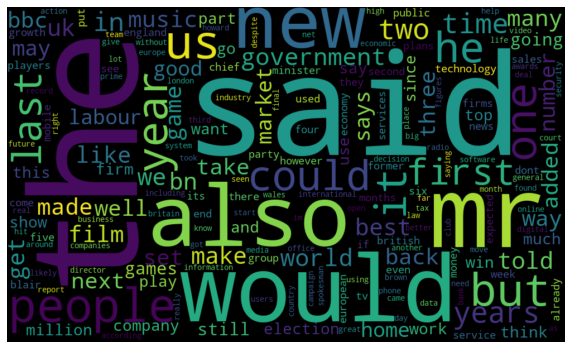

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [18]:
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=600, max_words=200).generate_from_frequencies(freq_le)

##### Lemmatization news column

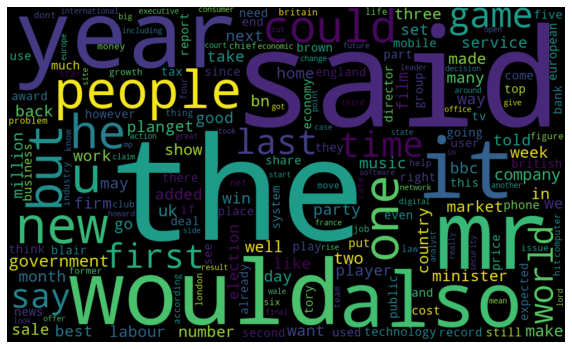

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#### 4. Demonstrate the generation of n-grams and part of speech tagging

I will use the news_clean_le column for the remainder of the analysis since the above results suggest it should yield better coherence scores.

In [29]:
#Word tokenization
tokens = ' '.join(df.news_clean_le).split()

In [32]:
# creating the bigrams
ngrams_2 = nltk.bigrams(tokens)

# freq distribution for these
freq_2grams = pd.Series(ngrams_2).value_counts().to_dict()
list(freq_2grams.items())[:20]

[(('last', 'year'), 501),
 (('said', 'mr'), 362),
 (('told', 'bbc'), 348),
 (('he', 'said'), 341),
 (('mr', 'blair'), 335),
 (('prime', 'minister'), 319),
 (('said', 'the'), 313),
 (('mr', 'brown'), 256),
 (('chief', 'executive'), 206),
 (('last', 'week'), 188),
 (('tony', 'blair'), 186),
 (('mobile', 'phone'), 183),
 (('said', 'would'), 180),
 (('bbc', 'news'), 178),
 (('general', 'election'), 177),
 (('new', 'york'), 167),
 (('bn', 'bn'), 163),
 (('six', 'nation'), 162),
 (('mr', 'howard'), 160),
 (('year', 'ago'), 160)]

In [33]:
# creating the bigrams
ngrams_3 = nltk.trigrams(tokens)

# freq distribution for these
freq_3grams = pd.Series(ngrams_3).value_counts().to_dict()
list(freq_3grams.items())[:20]

[(('told', 'bbc', 'news'), 147),
 (('bbc', 'news', 'website'), 97),
 (('told', 'bbc', 'radio'), 76),
 (('leader', 'michael', 'howard'), 58),
 (('the', 'prime', 'minister'), 55),
 (('million', 'dollar', 'baby'), 53),
 (('mr', 'blair', 'said'), 53),
 (('radio', 'today', 'programme'), 49),
 (('told', 'bbc', 'sport'), 48),
 (('bbc', 'radio', 'today'), 47),
 (('tory', 'leader', 'michael'), 41),
 (('mr', 'howard', 'said'), 41),
 (('next', 'general', 'election'), 39),
 (('the', 'liberal', 'democrat'), 38),
 (('the', 'lib', 'dems'), 37),
 (('chancellor', 'gordon', 'brown'), 33),
 (('leader', 'charles', 'kennedy'), 32),
 (('minister', 'tony', 'blair'), 32),
 (('prime', 'minister', 'tony'), 32),
 (('he', 'told', 'bbc'), 30)]

In [34]:
#Classify each token into its part of speech
from nltk.tag import pos_tag

pos_tags = pos_tag(tokens)
pos_tags[:20]

[('uk', 'JJ'),
 ('economy', 'NN'),
 ('facing', 'VBG'),
 ('major', 'JJ'),
 ('risk', 'NN'),
 ('the', 'DT'),
 ('uk', 'JJ'),
 ('manufacturing', 'NN'),
 ('sector', 'NN'),
 ('continue', 'VBP'),
 ('face', 'VBP'),
 ('serious', 'JJ'),
 ('challenge', 'NN'),
 ('next', 'IN'),
 ('two', 'CD'),
 ('year', 'NN'),
 ('british', 'JJ'),
 ('chamber', 'NN'),
 ('commerce', 'NN'),
 ('bcc', 'NN')]

In [35]:
#Frequency distribution of each word part of speech
from collections import Counter

Counter([j for i,j in pos_tag(tokens)])

Counter({'JJ': 91462,
         'NN': 227846,
         'VBG': 19893,
         'DT': 10693,
         'VBP': 14896,
         'IN': 12139,
         'CD': 6667,
         'VBD': 35610,
         'RBS': 178,
         'RB': 23871,
         'VBN': 12377,
         'VB': 11541,
         'PRP': 6085,
         'JJS': 2423,
         'CC': 2685,
         'JJR': 1843,
         'VBZ': 3944,
         'NNP': 908,
         'RBR': 1105,
         'NNS': 10713,
         'WP': 297,
         'WP$': 123,
         'MD': 5438,
         'WDT': 184,
         'PRP$': 542,
         'PDT': 128,
         'FW': 797,
         'WRB': 353,
         'EX': 320,
         'RP': 441,
         'POS': 3,
         'TO': 118,
         'NNPS': 3,
         'UH': 10})

#### 5. Create a Topic model of the text

In [36]:
# Create a list of the lemmatized text
lem_ls = list(df.news_clean_le.apply(lambda x: list(x.split())))
print(lem_ls[:2])

[['uk', 'economy', 'facing', 'major', 'risk', 'the', 'uk', 'manufacturing', 'sector', 'continue', 'face', 'serious', 'challenge', 'next', 'two', 'year', 'british', 'chamber', 'commerce', 'bcc', 'said', 'the', 'group', 'quarterly', 'survey', 'company', 'found', 'export', 'picked', 'last', 'three', 'month', 'best', 'level', 'eight', 'year', 'the', 'rise', 'came', 'despite', 'exchange', 'rate', 'cited', 'major', 'concern', 'however', 'bcc', 'found', 'whole', 'uk', 'economy', 'still', 'faced', 'major', 'risk', 'warned', 'growth', 'set', 'slow', 'it', 'recently', 'forecast', 'economic', 'growth', 'slow', 'little', 'manufacturer', 'domestic', 'sale', 'growth', 'fell', 'back', 'slightly', 'quarter', 'survey', 'firm', 'found', 'employment', 'manufacturing', 'also', 'fell', 'job', 'expectation', 'lowest', 'level', 'year', 'despite', 'positive', 'news', 'export', 'sector', 'worrying', 'sign', 'manufacturing', 'bcc', 'said', 'these', 'result', 'reinforce', 'concern', 'sector', 'persistent', 'inab

In [51]:
# Import Gensim package for topic modeling
import gensim
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(lem_ls)
# Term Document Frequency Corpus
corpus = [id2word.doc2bow(post) for post in lem_ls]

C:\Users\jwkon\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##### 5a. Find the optimal number of topics

In [41]:
from gensim.models import CoherenceModel
# range of 2 to 15 topics
scores = []
for i in range(2,15):
    print(f'Calcuting for {i} topics')
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=i, 
                                       random_state=42,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)
    # compute the coherence score
    coherence_model_lda = CoherenceModel(model=lda_model, 
                                         texts=lem_ls, 
                                         dictionary=id2word, 
                                         coherence='c_v')

    # retreive the coherence_scores
    coherence_lda = coherence_model_lda.get_coherence()
    
    scores.append((i,coherence_lda))

Calcuting for 2 topics
Calcuting for 3 topics
Calcuting for 4 topics
Calcuting for 5 topics
Calcuting for 6 topics
Calcuting for 7 topics
Calcuting for 8 topics
Calcuting for 9 topics
Calcuting for 10 topics
Calcuting for 11 topics
Calcuting for 12 topics
Calcuting for 13 topics
Calcuting for 14 topics


In [42]:
scores

[(2, 0.27604980306191185),
 (3, 0.33611332364977303),
 (4, 0.3443203449555383),
 (5, 0.3486016846120407),
 (6, 0.373158181047599),
 (7, 0.3802968706778887),
 (8, 0.3751739603541152),
 (9, 0.4082543251636663),
 (10, 0.3857246817603089),
 (11, 0.3808145890810366),
 (12, 0.3880823344960071),
 (13, 0.3959449459733179),
 (14, 0.42457151939624954)]

##### The score for 14 topics is the highest so we will use that number for our topic model

In [43]:
bf_lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=14, 
                                       random_state=42,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

coherence_model_lda = CoherenceModel(model=bf_lda_model, 
                                        texts=lem_ls, 
                                        dictionary=id2word, 
                                        coherence='c_v')

In [44]:
# retreive the coherence_scores
coherence_lda = coherence_model_lda.get_coherence()

print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.42457151939624954


##### 5b. Test the accuracy of your model
##### 5c. Display your results 2 different ways.

In [46]:
print(bf_lda_model.print_topics())

[(0, '0.019*"said" + 0.015*"the" + 0.010*"would" + 0.008*"government" + 0.007*"mr" + 0.006*"people" + 0.005*"he" + 0.005*"new" + 0.005*"year" + 0.005*"say"'), (1, '0.009*"said" + 0.009*"the" + 0.006*"arsenal" + 0.006*"set" + 0.005*"second" + 0.005*"last" + 0.005*"match" + 0.005*"win" + 0.004*"first" + 0.004*"seed"'), (2, '0.017*"the" + 0.009*"said" + 0.006*"year" + 0.005*"company" + 0.004*"new" + 0.004*"country" + 0.004*"eu" + 0.004*"turkey" + 0.004*"market" + 0.004*"two"'), (3, '0.014*"the" + 0.013*"said" + 0.008*"film" + 0.005*"ukip" + 0.005*"kilroysilk" + 0.005*"one" + 0.005*"mr" + 0.005*"it" + 0.005*"also" + 0.004*"he"'), (4, '0.010*"the" + 0.009*"game" + 0.008*"england" + 0.007*"said" + 0.005*"win" + 0.005*"player" + 0.005*"but" + 0.005*"ireland" + 0.005*"wale" + 0.005*"year"'), (5, '0.015*"said" + 0.014*"the" + 0.009*"year" + 0.009*"bn" + 0.006*"company" + 0.006*"mr" + 0.005*"new" + 0.005*"sale" + 0.005*"world" + 0.005*"would"'), (6, '0.017*"the" + 0.012*"said" + 0.010*"company" 

###### The topics are not very coherent. For example, for topic 1, it reads 'said the would government mr people he new year say,' this is difficult to even guess at an interpretation. What is needed at this point is continued model optimization to increase the model coherence even approximate an interepration from.  What is needed at this point is continued model optimization to increase the model coherence

In [47]:
# Packages necessry to support the visualization of the topic model
import pyLDAvis
import pyLDAvis.gensim_models

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(bf_lda_model, corpus, id2word)

In [48]:
# Saving the visualization to a html. Open this in another browser window
pyLDAvis.save_html(LDAvis_prepared,'Week7_TopicModel.html')

C:\Users\jwkon\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###### Considering that a well-performing model should display evenly separated bubbles and not overlapping, this model would not be considered optimal. Bubbles 9,13,4,8 are overlapping. However, this does provide a much better display for interpreting results than printing 

V. Conclusion:
  This analysis showed that we could generate summary details about a large body of text through standard text processing methods. Identifying the top and bottom words demonstrated the importance of good preprocessing techniques, one of these was lemmatization. Lemmatization reduces a word to its root, allowing us to group those root words and consequently reducing the overall tokenized word count. In theory, reducing the word count should increase model accuracy due to less redundancy. The bottom 10-word counts provide support for this theory.  
Topic modeling was a lengthy process in which subsequent performance seems heavily dependent on hyper-parameter optimization. Topic 14 had the highest coherence score, so this parameter value was used to create the model. Printing out the topics showed few, if not any, coherent statements. Generating an HTML document from LDAvis had similar results. However, it allowed us to view distinct topics within our model and confirm that our model was not fully optimized since it contained large areas where bubbles overlapped.  


VI. Sources
- https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0